In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

c:\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
fPath = 'Traffic_Violations.csv'
data = pd.read_csv(fPath)

c:\python35\lib\site-packages\IPython\core\interactiveshell.py:2683: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def lcs(X , Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)
 
    # declaring the array for storing the dp values
    L = [[None]*(n+1) for i in range(m+1)]
 
    """Following steps build L[m+1][n+1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j] , L[i][j-1])
 
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
    return L[m][n]
#end of function lcs

In [4]:
s = data['Make'].nunique()
prev= 0
while(s != prev):
    make = data['Make'].unique()
    prev = s
    makee = data['Make']
    reform = dict()
    for item in make:
        for iitem in make:
            if(iitem in reform):
                continue
            x = str(item)
            y = str(iitem)
            a = lcs(x,y)
            if(a == len(x) or a == len(y)):
                reform[x] = x
                reform[y] = y
                makee = makee.replace(y,x)
    print(makee.unique(),makee.nunique())
    data['Make'] = makee
    s = data['Make'].nunique()
    

['FORD' 'TOYOTA' 'HONDA' 'DODG' 'MINI COOPER' 'HYUNDAI' 'CADI' 'CHEVROLET'
 'AUDI' 'SATURN' 'LEXUS' 'ACUR' 'GILL' 'NONE' 'MERCEDEZ' 'BUICK'
 'KAWASAKI' 'JEEP' 'MITSUBISHI' 'SUNNY' 'LINCOLN' 'CHRY' 'INFI' 'SUBARU'
 'GMC' 'MAZDA' 'BMW' 'NISS' 'WV' 'PONT' 'OLDS' 'LNDR' 'CHEV' 'MERCURY'
 'XX' 'SAAB' 'CRUZ' 'HYANDAI' 'KIA' 'HUMMER' 'MERCEDES' 'MITSUBUSHI'
 'SCION' 'VOLK' 'RANGE ROVER' 'PLYMOUTH' 'M BENZ' '2004' 'UNKNOWN'
 'NEW FLYER' 'HARLEY DAVIDSON' 'HYUNDA' 'GRUMAN' 'IZUZU' 'BIGT'
 'VOLKSWAGON' 'JAGUAR' 'BENTLEY' 'CRYSTLER' 'SUZI' 'RIELLA' 'FREIGHTLINER'
 'MITS' 'VOLVO' 'TOY' 'VOLV' 'TOYT' 'PORS' 'ISUZU' 'CHRYSLER' 'SMART'
 'COLNAGO' 'PETE' 'SUBURU' 'TESLA' 'INTL' 'LOTUS' 'WILDFIRE' 'NIITRO'
 'MACK' 'VOLKSWAGEN' 'HINO' 'INIF' 'HYNDAI' 'LAND ROVER' 'SILVER' 'HINDA'
 'B,W' 'NISSAN' 'GS350' 'TOTOTA' 'SUSUKI' 'RAM' 'HUYDIA' 'FIAT' 'MITZ'
 'MB' 'RO VER' 'AVALON' 'VHECY' 'MNNI' 'SABB' 'WORK' 'SUBA' 'MAZA'
 'LANDVAL2015' 'HON' 'CHYSLER' 'NUSSAN' 'MASE' 'PTRB' 'ISUZ' 'CEHV'
 'FREIGHT' 'KEN' 'AST

['FORD' 'TOYOTA' 'HONDA' 'DODG' 'MINI COOPER' 'HYUNDAI' 'CADI' 'CHEVROLET'
 'AUDI' 'SATURN' 'LEXUS' 'ACUR' 'GILL' 'NONE' 'MERCEDEZ' 'BUICK'
 'KAWASAKI' 'JEEP' 'MITSUBISHI' 'SUNNY' 'LINCOLN' 'CHRY' 'INFI' 'SUBARU'
 'GMC' 'MAZDA' 'BMW' 'NISS' 'WV' 'PONT' 'OLDS' 'LNDR' 'MERCURY' 'XX'
 'SAAB' 'CRUZ' 'HYANDAI' 'KIA' 'HUMMER' 'MERCEDES' 'MITSUBUSHI' 'SCION'
 'VOLK' 'RANGE ROVER' 'PLYMOUTH' 'M BENZ' '2004' 'UNKNOWN' 'NEW FLYER'
 'HARLEY DAVIDSON' 'GRUMAN' 'IZUZU' 'BIGT' 'JAGUAR' 'BENTLEY' 'CRYSTLER'
 'SUZI' 'RIELLA' 'FREIGHTLINER' 'VOLVO' 'PORS' 'ISUZU' 'SMART' 'COLNAGO'
 'PETE' 'SUBURU' 'TESLA' 'INTL' 'LOTUS' 'WILDFIRE' 'NIITRO' 'MACK' 'HINO'
 'INIF' 'SILVER' 'HINDA' 'B,W' 'GS350' 'TOTOTA' 'SUSUKI' 'RAM' 'HUYDIA'
 'FIAT' 'MITZ' 'RO VER' 'AVALON' 'VHECY' 'MNNI' 'SABB' 'WORK'
 'LANDVAL2015' 'NUSSAN' 'MASE' 'PTRB' 'CEHV' 'ASTO' 'TIYITA' 'JETTA'
 'UPS TRUCK' 'AMO' 'HUDS' 'CHECY' 'FROD' 'DUCA' 'BRMR' 'THOM' 'MUSTANG'
 'ACYRA' 'TPYOTA' '4S' 'UTIL' '3FNY97' 'SCOIN' 'BWM' 'ACRUA' 'YAMA'
 'TAOTAO' 'B

['FORD' 'TOYOTA' 'HONDA' 'DODG' 'MINI COOPER' 'HYUNDAI' 'CADI' 'CHEVROLET'
 'AUDI' 'SATURN' 'LEXUS' 'ACUR' 'GILL' 'NONE' 'MERCEDEZ' 'BUICK'
 'KAWASAKI' 'JEEP' 'MITSUBISHI' 'SUNNY' 'LINCOLN' 'CHRY' 'INFI' 'SUBARU'
 'GMC' 'MAZDA' 'BMW' 'NISS' 'WV' 'PONT' 'OLDS' 'LNDR' 'MERCURY' 'XX'
 'SAAB' 'CRUZ' 'HYANDAI' 'KIA' 'HUMMER' 'MERCEDES' 'MITSUBUSHI' 'SCION'
 'VOLK' 'RANGE ROVER' 'PLYMOUTH' 'M BENZ' '2004' 'UNKNOWN' 'NEW FLYER'
 'HARLEY DAVIDSON' 'GRUMAN' 'IZUZU' 'BIGT' 'JAGUAR' 'BENTLEY' 'CRYSTLER'
 'SUZI' 'RIELLA' 'FREIGHTLINER' 'VOLVO' 'PORS' 'ISUZU' 'SMART' 'COLNAGO'
 'PETE' 'SUBURU' 'TESLA' 'INTL' 'LOTUS' 'WILDFIRE' 'NIITRO' 'MACK' 'HINO'
 'INIF' 'SILVER' 'HINDA' 'B,W' 'GS350' 'TOTOTA' 'SUSUKI' 'RAM' 'HUYDIA'
 'FIAT' 'MITZ' 'RO VER' 'AVALON' 'VHECY' 'MNNI' 'SABB' 'WORK'
 'LANDVAL2015' 'NUSSAN' 'MASE' 'PTRB' 'CEHV' 'ASTO' 'TIYITA' 'JETTA'
 'UPS TRUCK' 'AMO' 'HUDS' 'CHECY' 'FROD' 'DUCA' 'BRMR' 'THOM' 'MUSTANG'
 'ACYRA' 'TPYOTA' '4S' 'UTIL' '3FNY97' 'SCOIN' 'BWM' 'ACRUA' 'YAMA'
 'TAOTAO' 'B

In [5]:
data = data.drop(['Longitude','Latitude','Year','Geolocation'],axis = 1)

In [6]:
data3 = data.drop(['Date Of Stop', 'Time Of Stop','Description','SubAgency','Location','Charge','Article','Driver City','DL State','Arrest Type'],axis = 1)
data2 = data3.iloc[:,13:]
data2.head()

,Make,Model,Color,Violation Type,Contributed To Accident,Race,Gender,Driver State
0,FORD,4S,BLACK,Citation,No,BLACK,M,MD
1,TOYOTA,COROLLA,GREEN,Citation,No,WHITE,F,VA
2,HONDA,ACCORD,SILVER,Citation,No,BLACK,F,MD
3,DODG,DAKOTA,WHITE,Citation,No,BLACK,M,MD
4,MINI COOPER,2S,WHITE,Citation,No,WHITE,M,MD


In [7]:
data1 = data.loc[:,['Make','Race','Gender','Driver State','Violation Type']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281327 entries, 0 to 1281326
Data columns (total 5 columns):
Make              1281270 non-null object
Race              1281327 non-null object
Gender            1281327 non-null object
Driver State      1281316 non-null object
Violation Type    1281327 non-null object
dtypes: object(5)
memory usage: 48.9+ MB


In [8]:
lg = LogisticRegression(solver = 'sag')

In [9]:
for column in data1:
    data1[column] = pd.factorize(data1[column])[0]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281327 entries, 0 to 1281326
Data columns (total 5 columns):
Make              1281327 non-null int64
Race              1281327 non-null int64
Gender            1281327 non-null int64
Driver State      1281327 non-null int64
Violation Type    1281327 non-null int64
dtypes: int64(5)
memory usage: 48.9 MB


In [10]:
for column in data2:
    data2[column] = pd.factorize(data2[column])[0]
data2.info()
for column in data2:
    print(data2[column].nunique())

c:\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281327 entries, 0 to 1281326
Data columns (total 8 columns):
Make                       1281327 non-null int64
Model                      1281327 non-null int64
Color                      1281327 non-null int64
Violation Type             1281327 non-null int64
Contributed To Accident    1281327 non-null int64
Race                       1281327 non-null int64
Gender                     1281327 non-null int64
Driver State               1281327 non-null int64
dtypes: int64(8)
memory usage: 78.2 MB
346
17486
27
4
2
6
3
69


In [11]:
for column in data3:
    data3[column] = pd.factorize(data3[column])[0]
data3.info()
for column in data3:
    print(data3[column].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281327 entries, 0 to 1281326
Data columns (total 21 columns):
Agency                     1281327 non-null int64
Accident                   1281327 non-null int64
Belts                      1281327 non-null int64
Personal Injury            1281327 non-null int64
Property Damage            1281327 non-null int64
Fatal                      1281327 non-null int64
Commercial License         1281327 non-null int64
HAZMAT                     1281327 non-null int64
Commercial Vehicle         1281327 non-null int64
Alcohol                    1281327 non-null int64
Work Zone                  1281327 non-null int64
State                      1281327 non-null int64
VehicleType                1281327 non-null int64
Make                       1281327 non-null int64
Model                      1281327 non-null int64
Color                      1281327 non-null int64
Violation Type             1281327 non-null int64
Contributed To Accident    1281327 no

In [14]:
X = data2.drop('Gender',axis = 1).values
y = to_categorical(data2['Gender'])
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)

In [30]:
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)
# Fit the pipeline to 'samples'
pipeline.fit(data2.values)
# Plot the explained variances
features = range(pca.n_components_)
print(data2.values.shape)
plt.figure(1)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)

c:\python35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(1281327, 8)


([<matplotlib.axis.XTick at 0x22911df60f0>,
 <a list of 8 Text xticklabel objects>)

c:\python35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


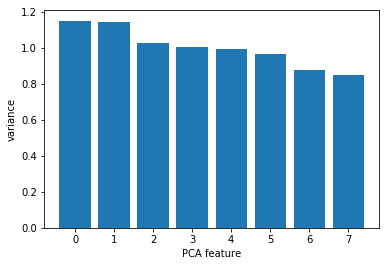

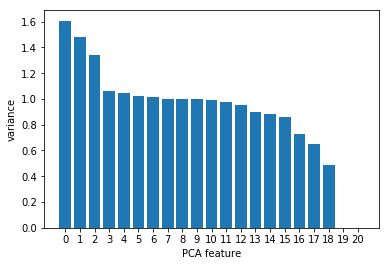

In [31]:
pipeline.fit(data3.values)
features = range(pca.n_components_)
plt.figure(2)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [46]:
X = data1.drop('Violation Type',axis = 1).values
y = data1['Violation Type'].values
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)

In [47]:
X = data2.drop('Gender',axis = 1).values
y = data2['Gender'].values
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
random_grid = {'n_estimators' : n_estimators,'max_features':max_features}
rfc = RandomForestClassifier()
rfc.fit(train_data,train_labels)
rfc.score(test_data,test_labels)

0.70260588607150387

In [33]:
X = data2.drop(['Violation Type'],axis = 1).values
y = data2['Violation Type'].values
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)

In [34]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_labels)
rfc.score(test_data,test_labels)

0.5855998584803811

In [35]:
km = KMeans(n_clusters = 3)
labels =km.fit_predict(data2.drop('Gender',axis = 1).values)
df = pd.DataFrame({'labels': labels, 'Gender': data2['Gender']})

In [36]:
df['Gender'].value_counts()

0    858401
1    421501
2      1425
Name: Gender, dtype: int64

In [37]:
ct = pd.crosstab(df['labels'],df['Gender'])
print(ct)

Gender       0       1     2
labels                      
0       811132  403864  1321
1        13315    5259    44
2        33954   12378    60


In [56]:
X = data2.drop('Violation Type',axis = 1).values
y = data2['Violation Type'].values
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)

In [57]:
train_data,test_data,train_labels,test_labels = tts(X,y,test_size = 0.3, random_state = 42)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)
lg.fit(train_data,train_labels)
lg.score(test_data,test_labels)

(896928, 7)
(384399, 7)
(896928,)
(384399,)


c:\python35\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.4968457254051129

In [16]:
n_cols = train_data.shape[1]
model = Sequential()
model.add(Dense(1000,activation = 'relu',input_shape = (n_cols,)))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels)

Epoch 1/1
896928/896928 [==============================] - 280s 313us/step - loss: 2.6115 - acc: 0.6614


c:\python35\lib\site-packages\keras\engine\training.py:353: RuntimeWarning: invalid value encountered in floor_divide
  num_batches = (size + batch_size - 1) // batch_size  # round up


TypeError: only integer scalar arrays can be converted to a scalar index